# 2. Chart Types

In [1]:
pip install -U seaborn

Requirement already up-to-date: seaborn in c:\users\doriela\anaconda3\lib\site-packages (0.12.0)
Note: you may need to restart the kernel to use updated packages.


There exist many different ways to visualize the data and not every one of them is suitable for every dataset. Before you venture into creating beautiful visualizations, ask yourself: "What is it that I am really trying to show?". Only then you can find a plot type that best suits your needs. Of course, sometimes you just want to explore first - go ahead and try different chart types but keep in mind that even though some of them may be visually attractive, they do not necessarily convey the information in the best possible way.

Here, we will look at the basic types of plots and what kind of data they are good for. In this chapter, we will use the seaborn library to visualize (most) of them.

We will use the EMP dataset for this exercise - let's start by reading the data in:

###### Set up the envirnoment

In [2]:
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

data_dir = 'data/w11_data'

# this is to silence pandas' warnings
import warnings
warnings.simplefilter(action='ignore')
    
%matplotlib inline

In [3]:
def assign_elevation_level(x):
    """
    Assigns elevation profile based on 
    elevation in meters above sea level.
    """
    if x <= 500: 
        return 'low'
    elif 500 < x <= 1500:
        return 'medium'
    else:
        return 'high'

###### Loading the data

In [4]:
data = pd.read_csv(f'{data_dir}/emp500_meta.tsv', index_col=0, sep='\t')
data.shape

(730, 8)

In [5]:
data.head(2) # explore the first two records

,shannon_diversity,env_biome,env_package,empo_4,empo_v2_4b,elevation,ph,water_content
sample_name,,,,,,,,
13114.6.Mock.Community1,5.488934,urban biome,misc environment,Mock community,Mock community,193.0,not applicable,not applicable
13114.6.Mock.Community4,6.456336,urban biome,misc environment,Mock community,Mock community,193.0,not applicable,not applicable


Let's add one more column that will contain elevation profile of a sample, classified based on the actual elevation value (see the setup section to see what the assign_elevation_level actually does):

In [6]:
data['elevation_level'] = data['elevation'].astype(float).apply(assign_elevation_level)

As different types of plots operate on different types of data (numerical vs. categorical), we can briefly investigate which kind of data is present in which column of our dataset (keep in mind that if a column contains mixed data types or only strings it will be shown as `object` type):

In [7]:
data.dtypes

shannon_diversity    float64
env_biome             object
env_package           object
empo_4                object
empo_v2_4b            object
elevation            float64
ph                    object
water_content         object
elevation_level       object
dtype: object

## 2.1 Distribution 

As you already saw in at least one of the previous exercises (and probably know from other classes), often we are interested in learning about the distribution of the data before we do any kind of analysis. This can be achieved in several ways that are presented below.

**NOTE**: Most of the plots below were first generated using seaborn plotting functions and then customized slightly using matplotlib. Do not worry for now if you don't understand some of the matplotlib commands - we will look at them in more detail in [Chapter 3](matplotlib_manipulations.ipnyb).

###### 2.1.1 Histogram

The most basic way to show an approximate distribution of numerical data where we divide the entire range of values into a series of intervals (bins) and then count how many values fall into each bin. We can also show the kernel density estimation (kde) which can smooth frequencies over the bins and show those as a continuous line.

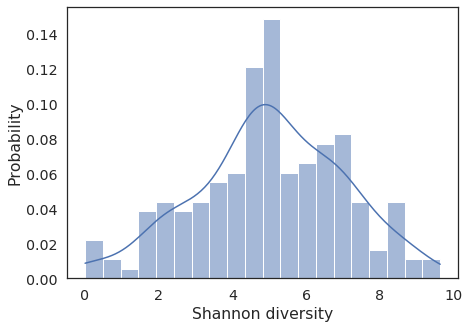

In [11]:
selection = data['env_biome'].isin(
    ('urban biome', 'desert biome', 'marine biome', 'forest biome', 'tundra biome')
)
subset = data.loc[selection, 'shannon_diversity']

sns.set(rc={'figure.figsize': (7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's histogram
    ax = sns.histplot(
        data=subset.tolist(), 
        kde=True,
        bins=20,
        stat='probability'
    )
    
    # matplotlib's customization
    ax.set_xlabel('Shannon diversity')

###### 2.1.2 Boxplot

A box plot can be used to represent the data distibution by visualizing its quartiles. Usually, it also contains whiskers which indicate variability of the data beyond the first and fourth quartile, and can contain individual points depicting outliers. You should always consult the documentation of the plotting library to make sure what the box plot exactly represents, as this may differ slightly between libraries and functions.

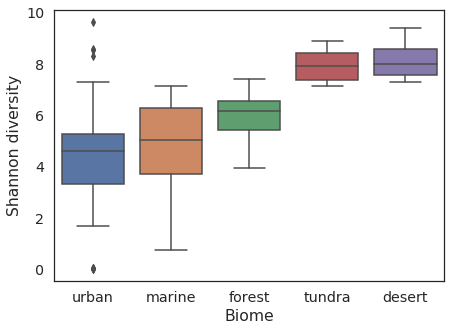

In [9]:
selection = data['env_biome'].isin(
    ('urban biome', 'desert biome', 'marine biome', 'forest biome', 'tundra biome')
)
subset = data.loc[selection, :]

sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's boxplot
    ax = sns.boxplot(
        data=subset, 
        x='env_biome', 
        y='shannon_diversity'
    )
    
    # matplotlib's customization
    ax.set_xlabel('Biome')
    ax.set_ylabel('Shannon diversity')
    
    xlabels = ax.get_xticklabels()
    xlabels = [l.get_text().replace(' biome', '') for l in xlabels]
    ax.set_xticklabels(xlabels)

###### 2.1.3 Violin plot

A violin plot is very similar to a box plot with the addition of a kde. You can think of it as a box plot combined with a histogram: usually you can see the quartile features plus a smoothed frequency distribution.

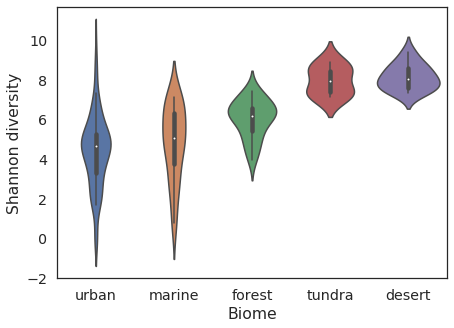

In [10]:
selection = data['env_biome'].isin(
    ('urban biome', 'desert biome', 'marine biome', 'forest biome', 'tundra biome')
)
subset = data.loc[selection, :]

sns.set(rc={'figure.figsize':(7, 5), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.3):
    # seaborn's violin plot
    ax = sns.violinplot(
        data=subset, 
        x='env_biome', 
        y='shannon_diversity', figsize=(20,20)
    )
    
    # matplotlib's customization
    ax.set_xlabel('Biome')
    ax.set_ylabel('Shannon diversity')
    
    xlabels = ax.get_xticklabels()
    xlabels = [l.get_text().replace(' biome', '') for l in xlabels]
    ax.set_xticklabels(xlabels)

###### 2.1.4 Ridgeline plot

A ridgeline plot, also know as Joyplot, shows the distribution of a numerical variable across many different groups. Distributions can be expressed using histograms or densitity plots, aligned to the same horizontal scale and presented with a slight overlap.

Here we will show the ridgeline plot of Shannon diversity for each of the selection groups.